<a href="https://colab.research.google.com/github/yonikremer/final_project/blob/master/evaluation/dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers

In [ ]:
from datasets import get_dataset_config_names, load_dataset
from transformers import AutoTokenizer
DATASET_NAME = "ted_talks_iwslt"

sub_sut_names = get_dataset_config_names(DATASET_NAME)
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")

In [ ]:
text_lengths = []
for sub_set_name in sub_sut_names:
    sub_set = load_dataset(DATASET_NAME, sub_set_name, split="train")["translation"]
    splited_sub_set_name = sub_set_name.split("_")
    language_code1, language_code2 = splited_sub_set_name[:2]
    for example in sub_set:
        text1 = example[language_code1]
        text2 = example[language_code2]
        tokenized_text1 = tokenizer(text1)["input_ids"]
        tokenized_text2 = tokenizer(text2)["input_ids"]
        text_lengths.append(len(tokenized_text1))
        text_lengths.append((tokenized_text2))

In [24]:
import seaborn as sns

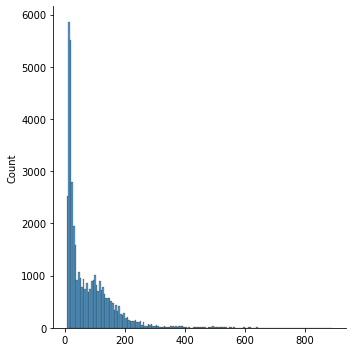

In [25]:
sns.displot(data=text_lengths)

In [28]:
import pandas as pd
text_lengths_series = pd.Series(text_lengths, dtype=int)

In [29]:
text_lengths_series.describe()

count    43198.000000
mean        77.682022
std         83.054081
min          6.000000
25%         19.000000
50%         46.000000
75%        114.000000
max        891.000000
dtype: float64